<a href="https://colab.research.google.com/github/jagadish9084/learnbay-ds-ml-course/blob/main/ml_models/supervised/linear_regression/housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objectives


Predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc

# Summary of the columns

1. price: The price of the house (numerical, integer).
2. area: The area of the house in square feet (numerical, integer).
3. bedrooms: The number of bedrooms in the house (numerical, integer).
4. bathrooms: The number of bathrooms (numerical, integer).
5. stories: The number of floors (stories) in the house (numerical, integer).
6. mainroad: Whether the house is near a main road (categorical, "yes" or "no").
7. guestroom: Whether the house has a guest room (categorical, "yes" or "no").
8. basement: Whether the house has a basement (categorical, "yes" or "no").
9. hotwaterheating: Whether the house has hot water heating (categorical, "yes" or "no").
10. airconditioning: Whether the house has air conditioning (categorical, "yes" or "no").
11. parking: Number of parking spaces available (numerical, integer).
12. prefarea: Whether the house is located in a preferred area (categorical, "yes" or "no").
13. furnishingstatus: The furnishing status of the house (categorical, "furnished", "semi-furnished", or "unfurnished").

Source: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data

# Data cleaning and feature Engineering

In [85]:
# Import the liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels import api as sm

warnings.filterwarnings('ignore')


In [86]:
# Load Data
data = pd.read_csv('/content/sample_data/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


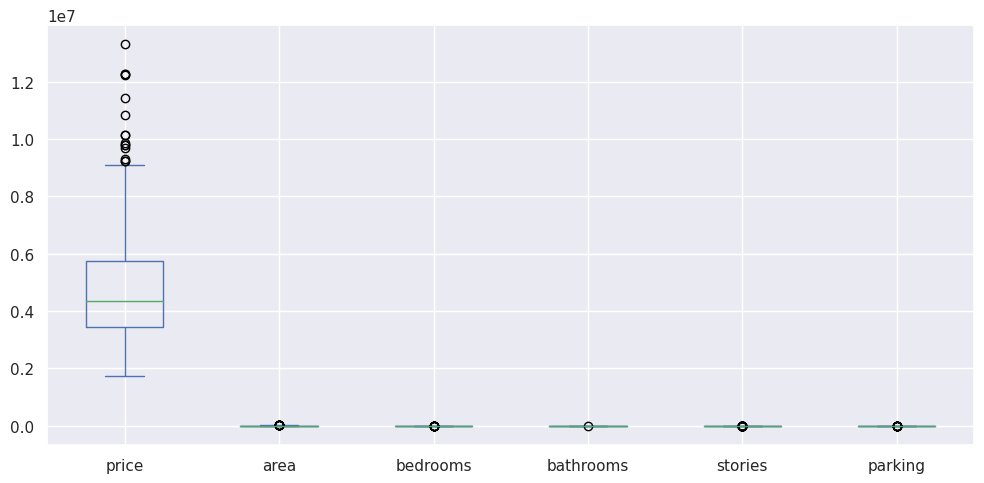

In [88]:
# Outlier detection and treatement
sns.set()
data.select_dtypes(include=np.number).plot(kind='box', figsize=(10, 5))
plt.tight_layout()
plt.show()


In [89]:
# Outlier treatment

for col in data.select_dtypes(include=np.number).columns:
  q1 = data[col].quantile(.25)
  q3 = data[col].quantile(.75)
  iqr = q3 - q1
  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr
  data[col].clip(lower, upper, inplace=True)


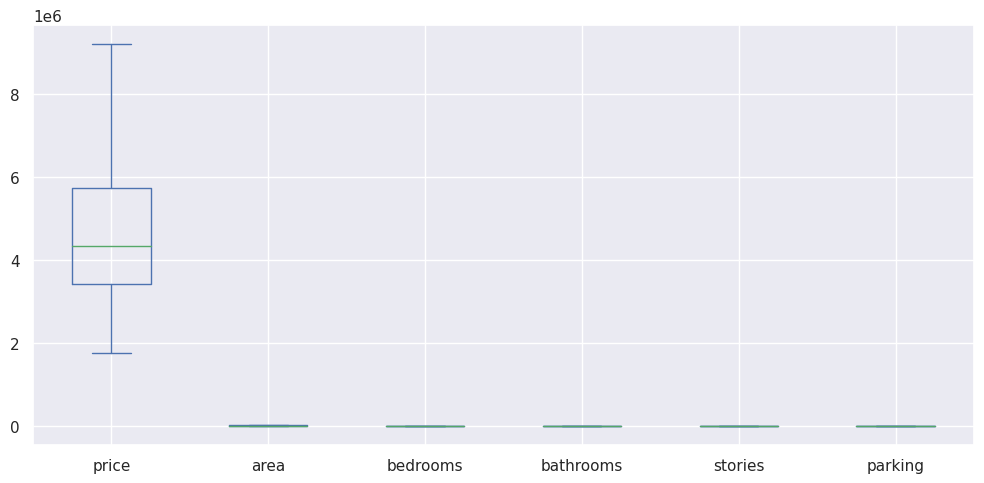

In [90]:
# Outlier treatment verification
sns.set()
data.select_dtypes(include=np.number).plot(kind='box', figsize=(10, 5))
plt.tight_layout()
plt.show()

In [91]:
# Unique values for non numeric columns
data[data.select_dtypes(exclude=np.number).columns].apply(pd.Series.unique)

,0
mainroad,"[yes, no]"
guestroom,"[no, yes]"
basement,"[no, yes]"
hotwaterheating,"[no, yes]"
airconditioning,"[yes, no]"
prefarea,"[yes, no]"
furnishingstatus,"[furnished, semi-furnished, unfurnished]"


In [92]:
# Onhot Encoding
columns = data.select_dtypes(exclude=np.number).columns
for col in columns:
  data[col] = data[col].map({'yes':1, 'no':0, 'unfurnished':0, 'semi-furnished': 1, 'furnished': 2})

In [93]:
# Unique values for categorical columns after encoding
data[columns].apply(pd.Series.unique)

,0
mainroad,"[1, 0]"
guestroom,"[0, 1]"
basement,"[0, 1]"
hotwaterheating,"[0, 1]"
airconditioning,"[1, 0]"
prefarea,"[1, 0]"
furnishingstatus,"[2, 1, 0]"


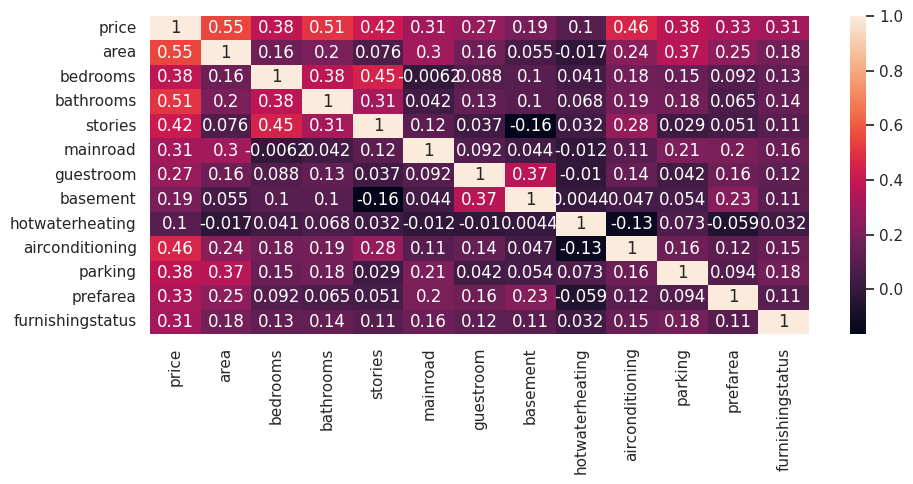

In [101]:
# Check correlation
f, ax = plt.subplots(1,1, figsize= (10, 5))
sns.heatmap(data.corr(), annot=True, ax=ax)
plt.tight_layout()
plt.show()

In [94]:
# Split feature and target variables
X =  data.drop(['price'], axis=1)
y = data[['price']]
print(f'Dimention of Features: {X.shape}')
print(f'Dimention of target: {y.shape}')

Dimention of Features: (545, 12)
Dimention of target: (545, 1)


In [95]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
print(f'Dimention of X_train: {X_train.shape}')
print(f'Dimention of X_test: {X_test.shape}')
print(f'Dimention of y_train: {y_train.shape}')
print(f'Dimention of y_test: {y_test.shape}')

# Reset index of y_train and y_test
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Dimention of X_train: (408, 12)
Dimention of X_test: (137, 12)
Dimention of y_train: (408, 1)
Dimention of y_test: (137, 1)


In [96]:
# Standardise the features
scalar = StandardScaler()
X_train_scaled = pd.DataFrame(scalar.fit_transform(X_train), columns=scalar.get_feature_names_out())
X_test_scaled = pd.DataFrame(scalar.fit_transform(X_test), columns=scalar.get_feature_names_out())
print(f'Dimention of X_train_scaled: {X_train_scaled.shape}')
print(f'Dimention of X_test_scaled: {X_test_scaled.shape}')

Dimention of X_train_scaled: (408, 12)
Dimention of X_test_scaled: (137, 12)


# OLS

In [97]:

# Add constant to the training and testing set
X_train_scaled_sm = sm.add_constant(X_train_scaled)
X_test_scaled_sm = sm.add_constant(X_test_scaled)

# Build OLS
ols = sm.OLS(y_train, X_train_scaled_sm).fit()
print(f"Model Summary: {ols.summary()}")

Model Summary:                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     71.73
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           2.59e-91
Time:                        18:03:33   Log-Likelihood:                -6189.3
No. Observations:                 408   AIC:                         1.240e+04
Df Residuals:                     395   BIC:                         1.246e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.723e+